In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import resample

In [2]:
df = pd.read_csv('./ObesityDataSet.csv')

In [3]:
print(df.head())

  Age  Gender Height Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
0  21  Female   1.62     64          no   no    2   3   no    no    2   
1  21  Female   1.52     56   Sometimes   no    3   3  yes   yes    3   
2  23    Male    1.8     77  Frequently   no    2   3   no    no    2   
3  27    Male    1.8     87  Frequently   no    3   3   no    no    2   
4  22    Male   1.78   89.8   Sometimes   no    2   1   no    no    2   

  family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
0                            yes   0   1  Sometimes  Public_Transportation   
1                            yes   3   0  Sometimes  Public_Transportation   
2                            yes   2   1  Sometimes  Public_Transportation   
3                             no   2   0  Sometimes                Walking   
4                             no   0   0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_W

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [5]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [6]:
unique_values = df.nunique()
print("Unique values per column:")
print(unique_values)

Unique values per column:
Age                               1394
Gender                               3
Height                            1562
Weight                            1518
CALC                                 5
FAVC                                 3
FCVC                               808
NCP                                637
SCC                                  3
SMOKE                                3
CH2O                              1263
family_history_with_overweight       3
FAF                               1186
TUE                               1130
CAEC                                 5
MTRANS                               6
NObeyesdad                           7
dtype: int64


In [7]:
duplicate_rows = df.duplicated().sum()
print(f"Duplicate rows: {duplicate_rows}")

Duplicate rows: 18


In [8]:
print(df['NObeyesdad'].value_counts())

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


In [16]:
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')



Visualizing the distribution of Height and Weight:


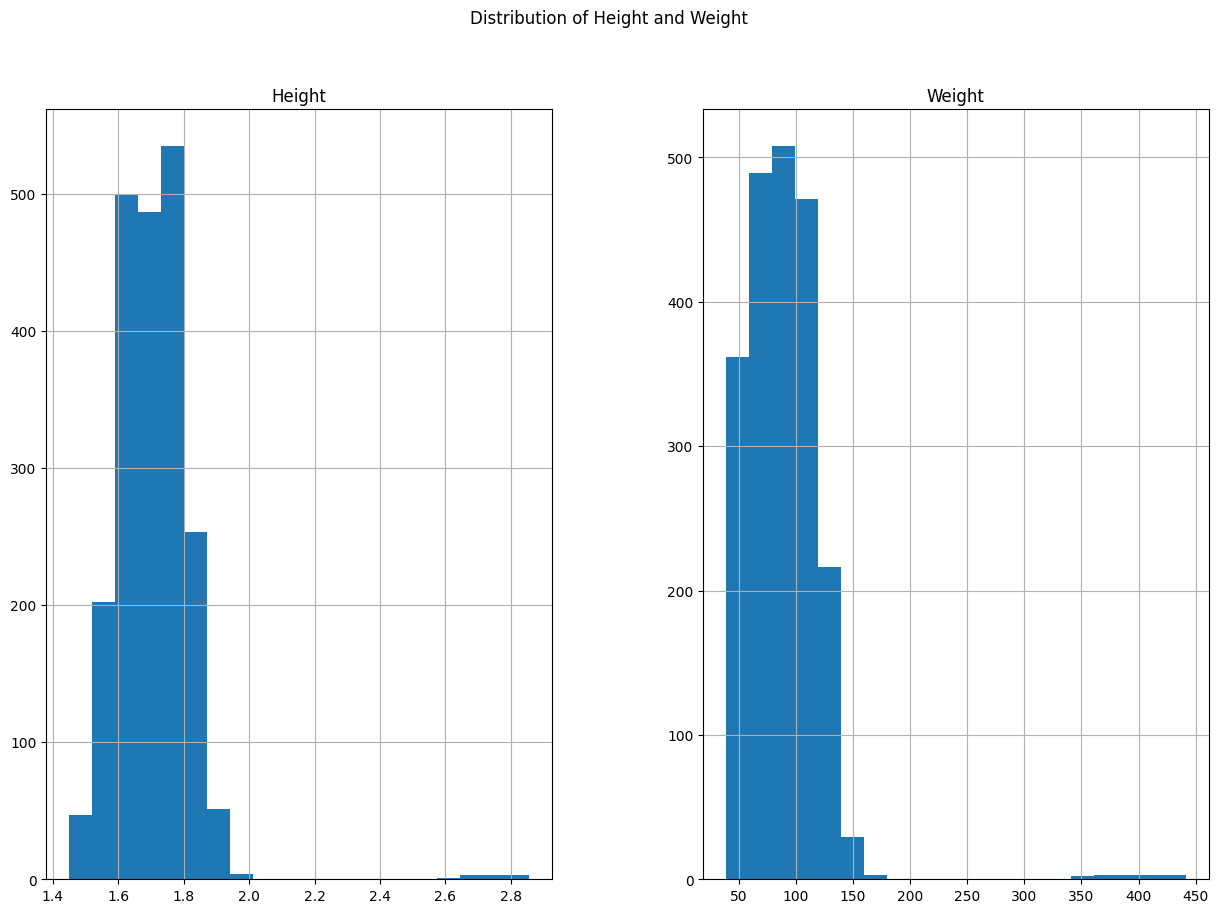

In [17]:
print("\nVisualizing the distribution of Height and Weight:")
df_numeric = df[['Height', 'Weight']]
df_numeric.hist(bins=20, figsize=(15,10))
plt.suptitle('Distribution of Height and Weight')
plt.show()

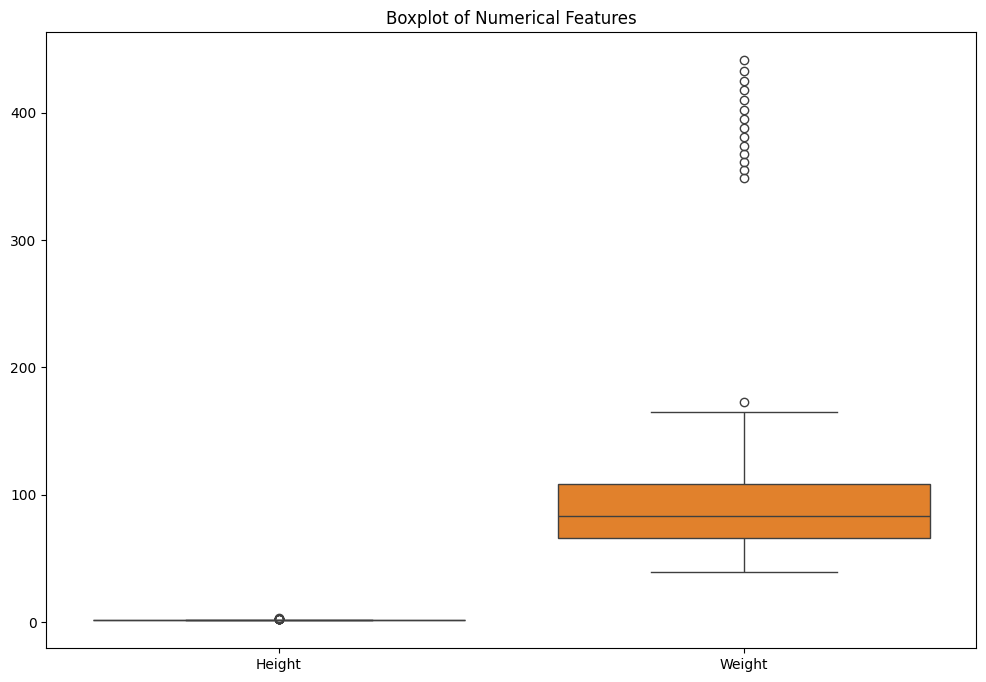

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df_numeric)
plt.title('Boxplot of Numerical Features')
plt.show()

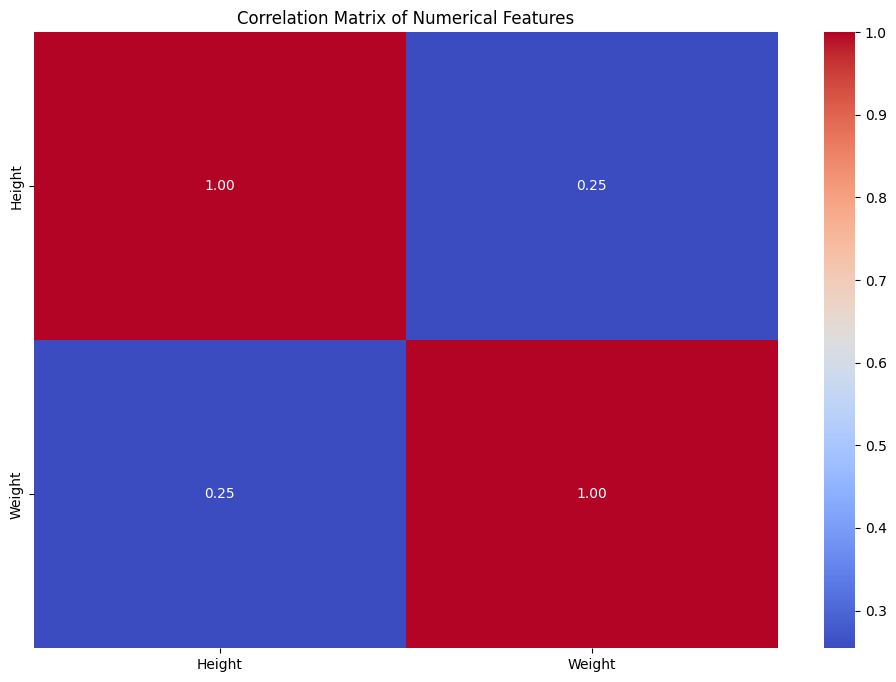

In [19]:
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [22]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [24]:
# Mengisi missing values dengan median
df['Height'] = df['Height'].fillna(df['Height'].median())
df['Weight'] = df['Weight'].fillna(df['Weight'].median())
df['Age'] = df['Age'].fillna(df['Age'].median())


In [26]:
# Mengisi missing values pada kolom kategorikal dengan modus tanpa menggunakan inplace=True
categorical_cols = ['Gender', 'CALC', 'FAVC', 'FCVC', 'NCP', 'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE', 'CAEC', 'MTRANS']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])  # Mengisi missing values dengan modus kolom


In [27]:
df.drop_duplicates(inplace=True)

In [28]:
# 3. Tangani Outliers menggunakan IQR (Interquartile Range)
# Menghitung IQR untuk kolom numerik
Q1 = df[['Height', 'Weight']].quantile(0.25)
Q3 = df[['Height', 'Weight']].quantile(0.75)
IQR = Q3 - Q1

In [29]:
df = df[~((df[['Height', 'Weight']] < (Q1 - 1.5 * IQR)) | (df[['Height', 'Weight']] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [30]:
# 4. Ubah Data Kategori menjadi Numerik (Label Encoding untuk kolom kategorikal)
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [32]:

# Tentukan fitur numerik dan target
features = df.drop('NObeyesdad', axis=1)  # Menghapus kolom target dari fitur
target = df['NObeyesdad']

In [33]:
# Memeriksa distribusi kelas target
class_counts = target.value_counts()
print(f"Class distribution before balancing: {class_counts}")

Class distribution before balancing: NObeyesdad
Obesity_Type_I         350
Obesity_Type_III       319
Obesity_Type_II        295
Overweight_Level_II    286
Normal_Weight          282
Overweight_Level_I     270
Insufficient_Weight    265
Name: count, dtype: int64


In [34]:
# Oversample kelas minoritas menggunakan upsampling
df_majority = df[df['NObeyesdad'] == 0]
df_minority = df[df['NObeyesdad'] == 1]

In [38]:
# Memeriksa distribusi kelas pada kolom 'NObeyesdad'
class_counts = target.value_counts()
print(f"Class distribution before balancing: {class_counts}")



Class distribution before balancing: NObeyesdad
Obesity_Type_I         350
Obesity_Type_III       319
Obesity_Type_II        295
Overweight_Level_II    286
Normal_Weight          282
Overweight_Level_I     270
Insufficient_Weight    265
Name: count, dtype: int64


In [40]:
# Memeriksa distribusi kelas pada kolom 'NObeyesdad'
class_counts = df['NObeyesdad'].value_counts()
print(f"Class distribution before balancing: {class_counts}")

# Jika jumlah kelas mayoritas atau minoritas ternyata 0, tampilkan pesan
if class_counts.min() == 0:
    print("Error: One of the classes is missing. Please check the distribution of 'NObeyesdad'.")
else:
    # Memisahkan kelas mayoritas dan minoritas berdasarkan nilai pada 'NObeyesdad'
    df_majority = df[df['NObeyesdad'] == class_counts.idxmax()]  # Kelas mayoritas (yang paling banyak)
    df_minority = df[df['NObeyesdad'] == class_counts.idxmin()]  # Kelas minoritas (yang paling sedikit)

    # Menyeimbangkan dataset menggunakan oversampling untuk kelas minoritas
    df_minority_upsampled = resample(df_minority,
                                     replace=True,  # Sampling dengan penggantian
                                     n_samples=len(df_majority),  # Menyamakan jumlah dengan kelas mayoritas
                                     random_state=42)

    # Menggabungkan kembali data mayoritas dan minoritas yang sudah di-oversample
    df_balanced = pd.concat([df_majority, df_minority_upsampled])

    # Memisahkan fitur dan target dari data yang sudah di-balance
    features_balanced = df_balanced.drop('NObeyesdad', axis=1)
    target_balanced = df_balanced['NObeyesdad']

    # Memeriksa distribusi kelas setelah balancing
    balanced_class_counts = target_balanced.value_counts()
    print(f"Class distribution after balancing: {balanced_class_counts}")


Class distribution before balancing: NObeyesdad
Obesity_Type_I         350
Obesity_Type_III       319
Obesity_Type_II        295
Overweight_Level_II    286
Normal_Weight          282
Overweight_Level_I     270
Insufficient_Weight    265
Name: count, dtype: int64
Class distribution after balancing: NObeyesdad
Obesity_Type_I         350
Insufficient_Weight    350
Name: count, dtype: int64


In [42]:
# Normalisasi atau Standarisasi Data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_balanced)

In [43]:
print("\nFirst few rows of scaled features:")
print(features_scaled[:5])


First few rows of scaled features:
[[ 0.35570089  1.08147804  1.60554167  1.45467738 -0.66895775  0.31851103
   1.35542927  0.46069094 -0.22976935 -0.0239114   1.6403188   0.60160077
   1.08274648  1.40875936 -1.56055885  0.56868961]
 [ 2.23036506  1.08147804  1.09431001  1.19372132 -2.36558971  0.31851103
  -0.88354577  0.46069094 -0.22976935 -0.0239114  -0.12695575 -1.6384021
   1.08274648  0.72599594  0.5361613  -1.71476772]
 [ 0.73063373 -0.8646264  -1.66634093  0.28037512  1.02767422  0.31851103
  -0.88354577 -1.98498048 -0.22976935 -0.0239114  -0.12695575 -1.6384021
  -1.44537622 -1.24536322  0.5361613  -1.71476772]
 [ 3.60511878 -0.8646264  -0.03039963  0.6718092   1.02767422  0.31851103
   1.35542927 -1.98498048 -0.22976935  8.34508034 -0.12695575  0.60160077
  -1.44537622 -1.24536322  0.5361613  -1.71476772]
 [ 8.0758532  -0.8646264  -0.95061661  0.45434582 -0.66895775  0.31851103
  -1.46917879 -1.98498048 -0.22976935 -0.0239114  -0.12695575  0.60160077
  -1.44537622  1.40875